In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Input,
    Embedding,
    Bidirectional,
    Conv1D,
    GlobalMaxPooling1D,
    LSTM,
    Attention,
    Dense,
    Dropout,
    Input,
    Concatenate,
    BatchNormalization,
)
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)

In [2]:
# # Load data
# train_data = pd.read_csv("train.csv")
# validation_data = pd.read_csv("validate.csv")
# X_train = train_data.drop(columns=["genre"]).values
# y_train = train_data["genre"]
# X_val = validation_data.drop(columns=["genre"]).values
# y_val = validation_data["genre"]

# # Encode labels
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_val_encoded = label_encoder.transform(y_val)

# # Compute class weights
# class_weights = compute_class_weight(
#     class_weight="balanced", classes=np.unique(y_train_encoded), y=y_train_encoded
# )

# # Tokenization
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(X_train)

# X_train_tokenized = tokenizer.texts_to_sequences(X_train)
# X_val_tokenized = tokenizer.texts_to_sequences(X_val)

# vocab_size = len(tokenizer.word_index) + 1
# max_seq_length = max(len(seq) for seq in X_train_tokenized)

# # Padding sequences
# X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(
#     X_train_tokenized, maxlen=max_seq_length, padding="post"
# )
# X_val_padded = tf.keras.preprocessing.sequence.pad_sequences(
#     X_val_tokenized, maxlen=max_seq_length, padding="post"
# )

In [3]:
# # Positional encoding
# def positional_encoding(seq_length, d_model):
#     pos = np.arange(seq_length)[:, np.newaxis]
#     i = np.arange(d_model)[np.newaxis, :]
#     angles = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
#     pos_encoding = pos * angles

#     pos_encoding[:, 0::2] = np.sin(pos_encoding[:, 0::2])
#     pos_encoding[:, 1::2] = np.cos(pos_encoding[:, 1::2])
#     pos_encoding = pos_encoding[np.newaxis, ...]

#     return tf.cast(pos_encoding, dtype=tf.float32)


# # Transformer Encoder Layer
# class TransformerEncoderLayer(tf.keras.layers.Layer):
#     def __init__(self, d_model, num_heads, dff, rate=0.1):
#         super(TransformerEncoderLayer, self).__init__()

#         self.mha = tf.keras.layers.MultiHeadAttention(
#             num_heads=num_heads, key_dim=d_model
#         )
#         self.ffn = tf.keras.Sequential(
#             [
#                 tf.keras.layers.Dense(dff, activation="relu"),
#                 tf.keras.layers.Dense(d_model),
#             ]
#         )

#         self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
#         self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

#         self.dropout1 = tf.keras.layers.Dropout(rate)
#         self.dropout2 = tf.keras.layers.Dropout(rate)

#     def call(self, inputs, training):
#         attn_output = self.mha(inputs, inputs, inputs)
#         attn_output = self.dropout1(attn_output, training=training)
#         out1 = self.layernorm1(inputs + attn_output)

#         ffn_output = self.ffn(out1)
#         ffn_output = self.dropout2(ffn_output, training=training)
#         out2 = self.layernorm2(out1 + ffn_output)

#         return out2


# # Transformer Model
# class TransformerModel(tf.keras.Model):
#     def __init__(
#         self,
#         num_layers,
#         d_model,
#         num_heads,
#         dff,
#         vocab_size,
#         num_classes,
#         max_seq_length,
#         rate=0.1,
#     ):
#         super(TransformerModel, self).__init__()
#         self.d_model = d_model
#         self.num_layers = num_layers
#         self.embedding = tf.keras.layers.Embedding(vocab_size, d_model)
#         self.pos_encoding = positional_encoding(max_seq_length, d_model)
#         self.enc_layers = [
#             TransformerEncoderLayer(d_model, num_heads, dff, rate)
#             for _ in range(num_layers)
#         ]
#         self.dropout = tf.keras.layers.Dropout(rate)
#         self.final_layer = tf.keras.layers.Dense(num_classes, activation="softmax")

#     def call(self, inputs, training):
#         seq_len = tf.shape(inputs)[1]
#         x = self.embedding(inputs)
#         x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
#         x += self.pos_encoding[:, :seq_len, :]
#         x = self.dropout(x, training=training)

#         for i in range(self.num_layers):
#             x = self.enc_layers[i](x, training)

#         x = tf.reduce_mean(x, axis=1)  # Global average pooling
#         return self.final_layer(x)


# # Instantiate the Transformer model
# num_layers = 4
# d_model = 128
# num_heads = 8
# dff = 512

# transformer_model = TransformerModel(
#     num_layers,
#     d_model,
#     num_heads,
#     dff,
#     vocab_size,
#     len(label_encoder.classes_),
#     max_seq_length,
# )

# # Compile the model
# optimizer = tf.keras.optimizers.Adam()
# loss = tf.keras.losses.SparseCategoricalCrossentropy()
# transformer_model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

# # Train the model
# history = transformer_model.fit(
#     X_train_padded,
#     y_train_encoded,
#     epochs=10,
#     validation_data=(X_val_padded, y_val_encoded),
#     class_weight=class_weights,
# )

# # Evaluate the model
# loss, accuracy = transformer_model.evaluate(X_val_padded, y_val_encoded)
# print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")

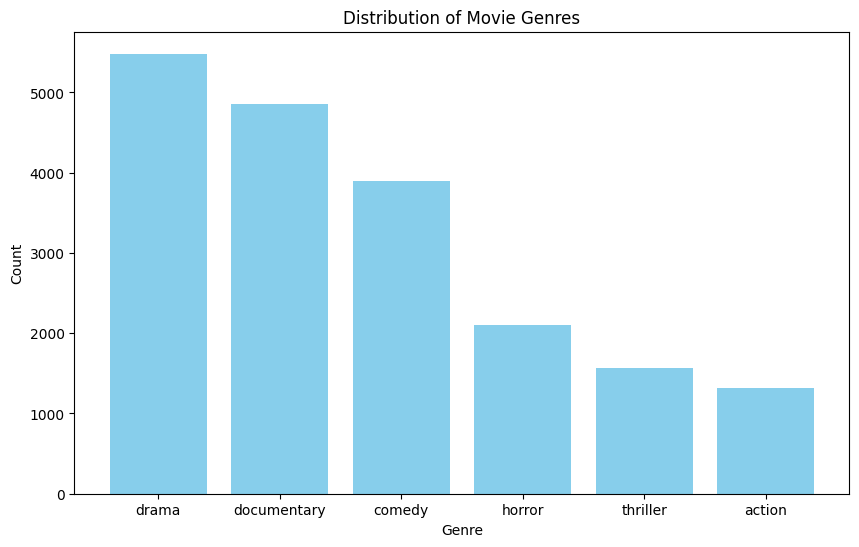

In [4]:
# Load the training data
train_data = pd.read_csv("train.csv")

# Count the occurrences of each genre
genre_counts = train_data["genre"].value_counts()


# Plot the distribution of genres
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts.values, color="skyblue")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Distribution of Movie Genres")
plt.xticks(genre_counts.index, genre_counts.index.tolist())
plt.show()

Drama and documentary genres are the most common, with 5483 and 4861
occurrences, respectively. Comedy is the third most common genre with 3896
occurrences.Horror, thriller, and action genres have fewer occurrences compared
to drama, documentary, and comedy, with 2104, 1568, and 1312 occurrences,
respectively. The distribution of the dataset is imbalanced, with drama and
documentary genres dominating the dataset, while horror, thriller, and action
genres are underrepresented. This class imbalance can potentially affect the
performance of machine learning models, particularly for genres with fewer
occurrences, as the model may struggle to generalize well to these classes.

In [5]:
train_data = pd.read_csv("train.csv")
validation_data = pd.read_csv("validate.csv")
test_data = pd.read_csv("test.csv")

In [6]:
X_train = train_data.drop(columns=["genre"])
y_train = train_data["genre"]
X_val = validation_data.drop(columns=["genre"])
y_val = validation_data["genre"]
X_test = test_data

In [7]:
# Normalize input features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)

In [8]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
class_weights = compute_class_weight(
    class_weight="balanced", classes=np.unique(y_train_encoded), y=y_train_encoded
)

In [9]:
# # Tokenize text data to get vocabulary size and maximum sequence length
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(X_train_normalized)
# vocab_size = len(tokenizer.word_index) + 1
# max_seq_length = max([len(text.split()) for text in X_train_normalized])

# # Set embedding dimension
# embedding_dim = 100  # Example dimension, you can adjust it based on your preference

In [10]:
def build_model(hidden_layers, hidden_nodes, learning_rate):
    model = tf.keras.Sequential()
    model.add(
        tf.keras.layers.Dense(
            hidden_nodes, activation="relu", input_shape=(X_train_normalized.shape[1],)
        )
    )
    for _ in range(hidden_layers - 1):
        model.add(tf.keras.layers.Dense(hidden_nodes, activation="relu"))
    model.add(tf.keras.layers.Dense(len(label_encoder.classes_), activation="softmax"))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [11]:
def plot_training_history(history, title):
    plt.plot(history.history["loss"], label="Train")
    plt.plot(history.history["val_loss"], label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.title(title)
    plt.legend()
    plt.show()

In [12]:
def evaluate_model(model, X_train_normalized, y_train, X_val_normalized, y_val):
    y_train_pred_data = model.predict(X_train_normalized)
    y_train_pred = np.argmax(y_train_pred_data, axis=1)
    y_val_pred_data = model.predict(X_val_normalized)
    y_val_pred = np.argmax(y_val_pred_data, axis=1)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    conf_matrix = confusion_matrix(y_val, y_val_pred)
    class_wise_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

    print("Accuracy Scores:")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Validation Accuracy: {val_accuracy}")

    print("\nClassification Report:")
    print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))

    print("\nClass-wise Accuracy:")
    for genre, acc in zip(label_encoder.classes_, class_wise_accuracy):
        print(f"{genre}: {acc}")

In [13]:
model_structures = [
    {"hidden_layers": 1, "hidden_nodes": 64},
    # {"hidden_layers": 2, "hidden_nodes": 32},
    # {"hidden_layers": 2, "hidden_nodes": 64},
]

for idx, structure in enumerate(model_structures, start=1):
    hidden_layers = structure["hidden_layers"]
    hidden_nodes = structure["hidden_nodes"]
    learning_rate = 0.001
    epochs = 100

    print(
        f"\nModel {idx}: Hidden Layers: {hidden_layers}, Hidden Nodes: {hidden_nodes}"
    )
    model = build_model(hidden_layers, hidden_nodes, learning_rate)
    history = model.fit(
        X_train_normalized,
        y_train_encoded,
        epochs=epochs,
        validation_data=(X_val_normalized, y_val_encoded),
        verbose=0,
        class_weight=dict(enumerate(class_weights)),
    )

    plot_training_history(history, f"Model {idx}: Training vs Validation Error")

    evaluate_model(
        model, X_train_normalized, y_train_encoded, X_val_normalized, y_val_encoded
    )


Model 1: Hidden Layers: 1, Hidden Nodes: 64


/Users/chinemerem/Documents/GitHub/ECE457B/env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyboardInterrupt: 

In [ ]:
def train_and_evaluate_model(
    build_model_func,
    X_train_normalized,
    y_train,
    X_val_normalized,
    y_val,
    label_encoder,
    epochs=100,
    batch_size=64,
):
    # Instantiate the model
    model = build_model_func(
        input_shape=X_train_normalized.shape[1:],
        num_classes=len(label_encoder.classes_),
    )

    # Compile the model
    model.compile(
        optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )

    # Train the model
    history = model.fit(
        X_train_normalized,
        y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val_normalized, y_val),
        verbose=1,
        # class_weight=dict(enumerate(class_weights)),
    )

    # Evaluate the model
    train_loss, train_accuracy = model.evaluate(X_train_normalized, y_train, verbose=0)
    val_loss, val_accuracy = model.evaluate(X_val_normalized, y_val, verbose=0)

    # Predict on validation set
    y_val_pred = np.argmax(model.predict(X_val_normalized), axis=-1)

    # Compute class-wise accuracy
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    class_wise_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

    # Compute F1 score
    f1_scores = []
    for genre, acc in zip(label_encoder.classes_, class_wise_accuracy):
        precision = (
            conf_matrix[
                label_encoder.transform([genre]), label_encoder.transform([genre])
            ]
            / conf_matrix[:, label_encoder.transform([genre])].sum()
        )
        recall = (
            conf_matrix[
                label_encoder.transform([genre]), label_encoder.transform([genre])
            ]
            / conf_matrix[label_encoder.transform([genre]), :].sum()
        )
        f1_score = 2 * (precision * recall) / (precision + recall)
        f1_scores.append(f1_score)

    # Print evaluation metrics
    print("Training Accuracy:", train_accuracy)
    print("Validation Accuracy:", val_accuracy)
    print("\nClass-wise Accuracy:")
    for genre, acc in zip(label_encoder.classes_, class_wise_accuracy):
        print(f"{genre}: {acc}")
    print("\nF1 Scores:")
    for genre, f1 in zip(label_encoder.classes_, f1_scores):
        print(f"{genre}: {f1}")

    # Plot training history
    plt.plot(history.history["loss"], label="Train")
    plt.plot(history.history["val_loss"], label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.show()

In [ ]:
# Define custom neural network model
def build_custom_model(input_shape, num_classes):
    input_layer = Input(input_shape)
    x = Dense(128, activation="relu")(input_layer)
    x = Dense(64, activation="relu")(x)
    output_layer = tf.keras.layers.Dense((num_classes), activation="sigmoid")(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

In [ ]:
def build_custom_model_batch(input_shape, num_classes):
    input_layer = Input(input_shape)
    x = Dense(256, activation="relu")(input_layer)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation="relu")(x)
    output_layer = Dense(num_classes, activation="softmax")(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

In [ ]:
def build_cnn_model(input_shape, num_classes):
    input_layer = Input(shape=input_shape)
    x = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input_layer)
    x = Conv1D(128, 5, activation="relu")(x)
    x = GlobalMaxPooling1D()(x)
    x = Dense(128, activation="relu")(x)
    output_layer = Dense(num_classes, activation="softmax")(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

In [ ]:
def build_bidirectional_lstm(input_shape, num_classes):
    input_layer = Input(shape=input_shape)
    x = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input_layer)
    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    x = Bidirectional(LSTM(32))(x)
    x = Dense(64, activation="relu")(x)
    output_layer = Dense(num_classes, activation="softmax")(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

In [ ]:
def build_lstm_with_attention(input_shape, num_classes):
    input_layer = Input(shape=input_shape)
    x = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input_layer)
    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    attention = Attention()([x, x])
    x = Dense(64, activation="relu")(attention)
    output_layer = Dense(num_classes, activation="softmax")(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

In [ ]:
def build_ensemble_model(input_shape, num_classes):
    input_layer = Input(shape=input_shape)

    # CNN branch
    cnn_branch = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input_layer)
    cnn_branch = Conv1D(128, 5, activation="relu")(cnn_branch)
    cnn_branch = GlobalMaxPooling1D()(cnn_branch)
    cnn_branch = Dense(64, activation="relu")(cnn_branch)

    # LSTM branch
    lstm_branch = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input_layer)
    lstm_branch = Bidirectional(LSTM(64, return_sequences=True))(lstm_branch)
    lstm_branch = Bidirectional(LSTM(32))(lstm_branch)
    lstm_branch = Dense(64, activation="relu")(lstm_branch)

    # Concatenate both branches
    concatenated = Concatenate()([cnn_branch, lstm_branch])
    output_layer = Dense(num_classes, activation="softmax")(concatenated)

    model = Model(inputs=input_layer, outputs=output_layer)
    return model

In [ ]:
# train_and_evaluate_model(
#     build_custom_model, X_train, y_train_encoded, X_val_normalized, y_val_encoded, label_encoder
# )
train_and_evaluate_model(
    build_custom_model_batch,
    X_train_normalized,
    y_train_encoded,
    X_val_normalized,
    y_val_encoded,
    label_encoder,
)
# train_and_evaluate_model(
#     build_cnn_model, X_train, y_train_encoded, X_val_normalized, y_val_encoded, label_encoder
# )
# train_and_evaluate_model(
#     build_bidirectional_lstm,
#     X_train,
#     y_train_encoded,
#     X_val_normalized,
#     y_val_encoded,
#     label_encoder,
# )
# train_and_evaluate_model(
#     build_lstm_with_attention,
#     X_train,
#     y_train_encoded,
#     X_val_normalized,
#     y_val_encoded,
#     label_encoder,
# )
# train_and_evaluate_model(
#     build_ensemble_model,
#     X_train,
#     y_train_encoded,
#     X_val_normalized,
#     y_val_encoded,
#     label_encoder,
# )

Epoch 1/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4242 - loss: 1.5679 - val_accuracy: 0.6354 - val_loss: 0.9993
Epoch 2/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6027 - loss: 1.0453 - val_accuracy: 0.6448 - val_loss: 0.9487
Epoch 3/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6503 - loss: 0.9355 - val_accuracy: 0.6543 - val_loss: 0.9298
Epoch 4/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6664 - loss: 0.8818 - val_accuracy: 0.6544 - val_loss: 0.9196
Epoch 5/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6730 - loss: 0.8545 - val_accuracy: 0.6546 - val_loss: 0.9217
Epoch 6/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6846 - loss: 0.8295 - val_accuracy: 0.6540 - val_loss: 0.9241
Epoch 7/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6983 - loss: 0.8010 - val_accuracy: 0.6564 - val_loss: 0.9300
Epoch 8/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7032 - loss: 0.7792 - val_accu

In [ ]:
# Define custom model 1
def build_custom_model_1(input_shape, num_classes):
    input_layer = Input(input_shape)
    x = Dense(128, activation="relu")(input_layer)
    x = Dense(64, activation="relu")(x)
    output_layer = Dense(num_classes, activation="sigmoid")(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model


# Define custom model 2
def build_custom_model_2(input_shape, num_classes):
    input_layer = Input(input_shape)
    x = Dense(256, activation="relu")(input_layer)
    x = Dense(128, activation="relu")(x)
    x = Dense(64, activation="relu")(x)
    output_layer = Dense(num_classes, activation="sigmoid")(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model


# Define custom model 3
def build_custom_model_3(input_shape, num_classes):
    input_layer = Input(input_shape)
    x = Dense(256, activation="relu")(input_layer)
    x = Dense(128, activation="relu")(x)
    x = Dense(64, activation="relu")(x)
    x = Dense(32, activation="relu")(x)
    output_layer = Dense(num_classes, activation="sigmoid")(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model


# Load and preprocess the data
# Assuming you have already loaded and preprocessed the data as X_train, y_train, X_val, y_val

# Build and compile custom model 1
model_1 = build_custom_model_1(
    input_shape=X_train_normalized.shape[1:], num_classes=len(label_encoder.classes_)
)
model_1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Build and compile custom model 2
model_2 = build_custom_model_2(
    input_shape=X_train_normalized.shape[1:], num_classes=len(label_encoder.classes_)
)
model_2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Build and compile custom model 3
model_3 = build_custom_model_3(
    input_shape=X_train_normalized.shape[1:], num_classes=len(label_encoder.classes_)
)
model_3.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
def train_and_evaluate_ensemble_model(
    X_train_normalized, y_train, X_val_normalized, y_val, label_encoder
):
    # Define build_model function for each custom model
    build_model_funcs = [
        build_custom_model_1,
        build_custom_model_2,
        build_custom_model_3,
    ]

    # Train and evaluate each custom model
    models = []
    for build_model_func in build_model_funcs:
        model = build_model_func(
            input_shape=X_train_normalized.shape[1:],
            num_classes=len(label_encoder.classes_),
        )
        train_and_evaluate_model(
            build_model_func,
            X_train_normalized,
            y_train,
            X_val_normalized,
            y_val,
            label_encoder,
        )
        models.append(model)

    # Ensemble predictions
    preds_ensemble = np.mean(
        [model.predict(X_val_normalized) for model in models], axis=0
    )
    y_val_pred = np.argmax(preds_ensemble, axis=-1)

    # Compute class-wise accuracy
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    class_wise_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

    # Compute F1 score
    f1_scores = []
    for genre, acc in zip(label_encoder.classes_, class_wise_accuracy):
        precision = (
            conf_matrix[
                label_encoder.transform([genre]), label_encoder.transform([genre])
            ]
            / conf_matrix[:, label_encoder.transform([genre])].sum()
        )
        recall = (
            conf_matrix[
                label_encoder.transform([genre]), label_encoder.transform([genre])
            ]
            / conf_matrix[label_encoder.transform([genre]), :].sum()
        )
        f1_score = 2 * (precision * recall) / (precision + recall)
        f1_scores.append(f1_score)

    # Print evaluation metrics
    print("\nEnsemble Model Evaluation:")
    print("\nClass-wise Accuracy:")
    for genre, acc in zip(label_encoder.classes_, class_wise_accuracy):
        print(f"{genre}: {acc}")
    print("\nF1 Scores:")
    for genre, f1 in zip(label_encoder.classes_, f1_scores):
        print(f"{genre}: {f1}")


# Train and evaluate ensemble model
train_and_evaluate_ensemble_model(
    X_train_normalized, y_train_encoded, X_val_normalized, y_val_encoded, label_encoder
)

In [ ]:
# # Tokenization
# tokenizer = tf.keras.preprocessing.text.Tokenizer()
# tokenizer.fit_on_texts(X_train_normalized)

# X_train_tokenized = tokenizer.texts_to_sequences(X_train_normalized)
# X_val_tokenized = tokenizer.texts_to_sequences(X_val_normalized)

# vocab_size = len(tokenizer.word_index) + 1
# max_seq_length = max(len(seq) for seq in X_train_tokenized)

# # Padding sequences
# X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(
#     X_train_tokenized, maxlen=max_seq_length, padding="post"
# )
# X_val_padded = tf.keras.preprocessing.sequence.pad_sequences(
#     X_val_tokenized, maxlen=max_seq_length, padding="post"
# )

In [ ]:
# # Positional encoding
# def positional_encoding(seq_length, d_model):
#     pos = np.arange(seq_length)[:, np.newaxis]
#     i = np.arange(d_model)[np.newaxis, :]
#     angles = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
#     pos_encoding = pos * angles

#     pos_encoding[:, 0::2] = np.sin(pos_encoding[:, 0::2])
#     pos_encoding[:, 1::2] = np.cos(pos_encoding[:, 1::2])
#     pos_encoding = pos_encoding[np.newaxis, ...]

#     return tf.cast(pos_encoding, dtype=tf.float32)


# # Transformer Encoder Layer
# class TransformerEncoderLayer(tf.keras.layers.Layer):
#     def __init__(self, d_model, num_heads, dff, rate=0.1):
#         super(TransformerEncoderLayer, self).__init__()

#         self.mha = tf.keras.layers.MultiHeadAttention(
#             num_heads=num_heads, key_dim=d_model
#         )
#         self.ffn = tf.keras.Sequential(
#             [
#                 tf.keras.layers.Dense(dff, activation="relu"),
#                 tf.keras.layers.Dense(d_model),
#             ]
#         )

#         self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
#         self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

#         self.dropout1 = tf.keras.layers.Dropout(rate)
#         self.dropout2 = tf.keras.layers.Dropout(rate)

#     def call(self, inputs, training):
#         attn_output = self.mha(inputs, inputs, inputs)
#         attn_output = self.dropout1(attn_output, training=training)
#         out1 = self.layernorm1(inputs + attn_output)

#         ffn_output = self.ffn(out1)
#         ffn_output = self.dropout2(ffn_output, training=training)
#         out2 = self.layernorm2(out1 + ffn_output)

#         return out2


# # Transformer Model
# class TransformerModel(tf.keras.Model):
#     def __init__(
#         self,
#         num_layers,
#         d_model,
#         num_heads,
#         dff,
#         vocab_size,
#         num_classes,
#         max_seq_length,
#         rate=0.1,
#     ):
#         super(TransformerModel, self).__init__()
#         self.d_model = d_model
#         self.num_layers = num_layers
#         self.embedding = tf.keras.layers.Embedding(vocab_size, d_model)
#         self.pos_encoding = positional_encoding(max_seq_length, d_model)
#         self.enc_layers = [
#             TransformerEncoderLayer(d_model, num_heads, dff, rate)
#             for _ in range(num_layers)
#         ]
#         self.dropout = tf.keras.layers.Dropout(rate)
#         self.final_layer = tf.keras.layers.Dense(num_classes, activation="softmax")

#     def call(self, inputs, training):
#         seq_len = tf.shape(inputs)[1]
#         x = self.embedding(inputs)
#         x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
#         x += self.pos_encoding[:, :seq_len, :]
#         x = self.dropout(x, training=training)

#         for i in range(self.num_layers):
#             x = self.enc_layers[i](x, training)

#         x = tf.reduce_mean(x, axis=1)  # Global average pooling
#         return self.final_layer(x)


# # Instantiate the Transformer model
# num_layers = 4
# d_model = 128
# num_heads = 8
# dff = 512

# transformer_model = TransformerModel(
#     num_layers,
#     d_model,
#     num_heads,
#     dff,
#     vocab_size,
#     len(label_encoder.classes_),
#     max_seq_length,
# )

# # Compile the model
# optimizer = tf.keras.optimizers.Adam()
# loss = tf.keras.losses.SparseCategoricalCrossentropy()
# transformer_model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

# # # Train the model
# # history = transformer_model.fit(
# #     X_train_padded,
# #     y_train_encoded,
# #     epochs=10,
# #     validation_data=(X_val_padded, y_val_encoded),
# #     class_weight=class_weights,
# # )
# # Train the model
# history = transformer_model.fit(
#     X_train_padded,
#     y_train_encoded,
#     epochs=10,
#     validation_data=(X_val_padded, y_val_encoded),
#     # class_weight=class_weights,
# )

# # Evaluate the model
# loss, accuracy = transformer_model.evaluate(X_val_padded, y_val_encoded)
# print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")

# # Evaluate the model
# loss, accuracy = transformer_model.evaluate(X_val_padded, y_val_encoded)
# print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")